In [2]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib 
!pip install sklearn

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
     |█████████████████               | 8.9 MB 196 kB/s eta 0:00:41

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

ImportError: No module named pandas

# Intro ☕️
The dataset I received holds customer data grouping by shopping behavior and personal information in order to improve targeted marketing.
It has 15 features (include ID) both numerical and categorical.
Its size is 8120 rows x 15 columns, customers are classified into 4 shopping groups (A,B,C,D)

In [3]:
df = pd.read_csv('customers2.csv') 
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Shop_Day,Shop_Other,Shop_Dairy,Shop_Household,Shop_Meat,Group
0,462809.0,Male,No,22.0,No,Healthcare,1.0,average,4.0,4.0,13.358,12.344,7.289,-5.184,D
1,462643.0,Female,Yes,38.0,Yes,Engineer,NaN,Average,3.0,4.0,4.049,5.010,3.936,2.621,A
2,466315.0,Female,Yes,67.0,Yes,Engineer,1.0,Low,1.0,6.0,9.349,3.823,2.950,0.583,B
3,461735.0,Male,Yes,67.0,Yes,Lawyer,0.0,High,2.0,6.0,-0.617,-2.289,6.696,3.299,B
4,462669.0,Female,Yes,40.0,Yes,Entertainment,NaN,NaN,6.0,6.0,6.318,5.407,5.391,2.580,A
5,461319.0,Male,Yes,56.0,No,Artist,0.0,average,2.0,NaN,10.270,11.683,12.740,4.996,C
6,460156.0,Male,No,32.0,Yes,Healthcare,1.0,Low,3.0,6.0,13.422,2.968,5.226,5.370,C
7,464347.0,Female,No,33.0,Yes,Healthcare,1.0,Low,3.0,6.0,12.074,1.829,7.381,6.384,D
8,465015.0,Female,Yes,61.0,Yes,Engineer,0.0,Low,3.0,7.0,8.891,2.658,-1.026,6.459,D
9,465176.0,Female,Yes,55.0,Yes,Artist,1.0,Average,4.0,6.0,13.460,4.421,9.754,14.732,C


In [4]:
df.describe()

,ID,Age,Work_Experience,Family_Size,Shop_Day,Shop_Other,Shop_Dairy,Shop_Household,Shop_Meat
count,7829.000000,7899.000000,7286.000000,7676.000000,7829.000000,8005.000000,8120.000000,8120.000000,8120.000000
mean,463499.512581,43.468287,2.638210,2.852658,5.089156,7.750935,5.331856,6.096408,4.433825
std,2606.526064,16.745933,3.402537,1.533825,1.502160,4.984446,3.611203,4.230066,4.460564
min,458982.000000,18.000000,0.000000,1.000000,0.000000,-7.759000,-6.657000,-8.089000,-9.622000
25%,461247.000000,30.000000,0.000000,2.000000,4.000000,4.329000,3.069000,3.354000,1.540000
50%,463503.000000,40.000000,1.000000,3.000000,6.000000,7.104000,5.143500,5.590500,4.054500
75%,465787.000000,53.000000,4.000000,4.000000,6.000000,10.947000,7.475000,8.365000,6.856250
max,467974.000000,89.000000,14.000000,9.000000,7.000000,27.020000,21.430000,26.944000,22.597000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8120 entries, 0 to 8119
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7829 non-null   float64
 1   Gender           8120 non-null   object 
 2   Ever_Married     7979 non-null   object 
 3   Age              7899 non-null   float64
 4   Graduated        8042 non-null   object 
 5   Profession       7718 non-null   object 
 6   Work_Experience  7286 non-null   float64
 7   Spending_Score   8019 non-null   object 
 8   Family_Size      7676 non-null   float64
 9   Shop_Day         7829 non-null   float64
 10  Shop_Other       8005 non-null   float64
 11  Shop_Dairy       8120 non-null   float64
 12  Shop_Household   8120 non-null   float64
 13  Shop_Meat        8120 non-null   float64
 14  Group            8120 non-null   object 
dtypes: float64(9), object(6)
memory usage: 951.7+ KB


## Features:
- ID: Customer ID (unique)
- Gender: Boolean, Male/Female
- Ever_Married: Boolean, Yes/No - was the customer married
- Age: Float, customer age (18 and above)
- Graduated: Boolean, Yes/No - is the customer a high school graduate
- Profession: Categorical - customer profession 
  ('Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive' 'Doctor' 'Homemaker' 'Marketing')
- Work_Experience: Integer - number of years of work experience
- Spending_Score: Categorical, Low/Average/High - spending habits
- Family_Size: Integer - number of family members (household)
- Shop_Day: Categorical, 1-7 (Sunday-Saturday) - day of week when most shopping occurs by customer
- Shop_Other: Float - normalized measure of customer deviation from average store     customer spending on non specified products
- Shop_Dairy: Float - normalized measure of customer deviation from average store customer spending on dairy products
- Shop_Household: Float - normalized measure of customer deviation from average store customer spending on household products
- Shop_Meat: continuous - normalized measure of customer deviation from average store customer spending on meat products
- Target Feature: Group: A,B,C,D



### My initial thoughts about the data 🧐 
1. Strong correlation between Profession and Spending_Score.
2. Strong correlation between Age and Spending_Score.
3. Strong correlation between Profession and Shop_Meat.
4. Strong correlation between Profession and Shop_Dairy.
5. Strong correlation between Gender and Spending_Score.


In [6]:
df.drop(['ID'], axis=1, inplace=True)
print(df['Profession'].unique())
print(f"Male count: {sum(df['Gender'] == 'Male')}")
print(f"Female count: {sum(df['Gender'] == 'Female')}")

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Male count: 4447
Female count: 3673


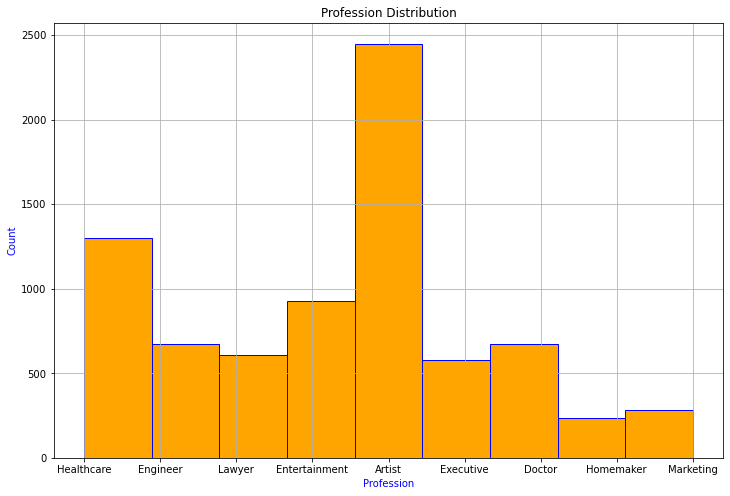

In [10]:
df = df.dropna(axis=0, subset=['Profession'])
df['Profession'].hist(color='orange', bins=len(df['Profession'].unique()), edgecolor='blue')
plt.title('Profession Distribution')
plt.ylabel('Count', color='blue')
plt.xlabel('Profession', color='blue')
plt.grid(True)
plt.rcParams['figure.figsize'] = [100, 8]
plt.show()

In [14]:
count_precent_tablt_profession = pd.DataFrame()
count_precent_tablt_profession["count"] = df["Profession"].value_counts()
count_precent_tablt_profession["count%"] = round((df["Profession"].value_counts()/df.shape[0])*100, 3)
count_precent_tablt_profession

,count,count%
Artist,2449,31.731
Healthcare,1297,16.805
Entertainment,925,11.985
Doctor,672,8.707
Engineer,670,8.681
Lawyer,605,7.839
Executive,580,7.515
Marketing,284,3.680
Homemaker,236,3.058


In [15]:
count_precent_tablt_gender = pd.DataFrame()
count_precent_tablt_gender["count"] = df["Gender"].value_counts()
count_precent_tablt_gender["count%"] = round((df["Gender"].value_counts()/df.shape[0])*100, 3)
count_precent_tablt_gender

,count,count%
Male,4238,54.911
Female,3480,45.089


In [16]:
count_precent_tablt_group = pd.DataFrame()
count_precent_tablt_group["count"] = df["Group"].value_counts()
count_precent_tablt_group["count%"] = round((df["Group"].value_counts()/df.shape[0])*100, 3)
count_precent_tablt_group

,count,count%
D,2156,27.935
C,1903,24.657
A,1881,24.372
B,1778,23.037


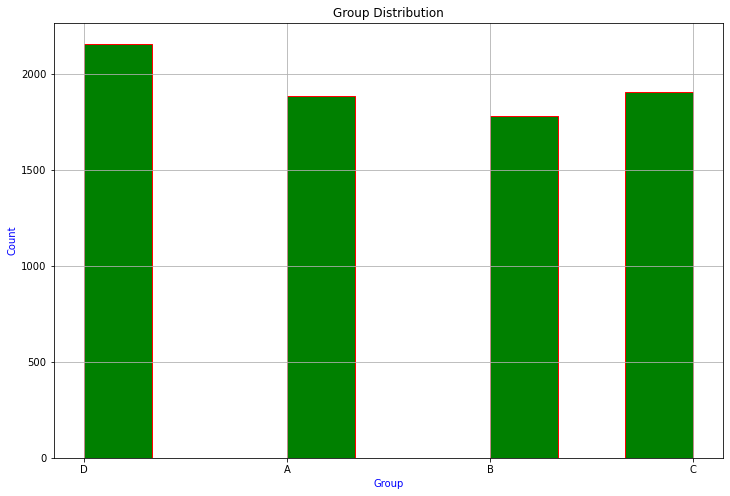

In [20]:
df['Group'].hist(color='green', bins=len(df['Profession'].unique()), edgecolor='red')
plt.title('Group Distribution')
plt.ylabel('Count', color='blue')
plt.xlabel('Group', color='blue')
plt.grid(True)
plt.show()

# Initial Data Analysis 📈

In my data set were:<br>
<u>Categorical Features:</u>
- Gender
- Ever_Married
- Graduated
- Profession
- Spending_Score
- Group

<u>Numeric Features:</u>
- Age
- Work_Experience
- Family_Size
- Shop_Day
- Shop_Other
- Shop_Dairy
- Shop_Household
- Shop_Meat

I have found the categorical data divided into ordinal and nominal data:

<u>Numinal:</u>
- Profession - the order of professions does not matter.
- Gender - Male/Female does not make any order.
- Ever_Married - (Yes/No)
- Graduated - (Yes/No)

<u>Ordinal:</u>
- Spending_Score - three levels (low < average < high).
- Group - 4 groups (A, B, C, D).


### Data Cleanup
In order to analyze the data the best way possible, I had to get rid of the missing data (where data is categorical) and replace the missing numeric values with the median of any numeric column so that it does not disturb the data analysis and cause any distortion.

<u>More things I considered crucial in order to create a clean CSV file:</u>
- Removed ID column which is not relevant.
- Since there is no day 0, I Removed all rows where 
Shop_Day == 0 (72 rows).
- Keep all float numbers data 3 digits rounded.
- I have noticed that the Spending_Score data has lower and upper case mixed (e.g. 'Average' | 'average'), so I replaced all categorical data to be lower case, in Profession I have not, since these were not mixed.
- Drop all Categorical missing data (‘na’).


In [2]:
print(df)